In [1]:
import numpy as np
import matplotlib.pyplot as plt
import edl
import plotting

%matplotlib widget

In [2]:
ion_concentration_molar = 1e-1
ion_diameter_m = 2.75e-10
solvent_diameter_m = 2.75e-10
potentials = np.linspace(-0.5, 0.5, 100)

Sweep from -0.01V to -0.50V. Maximum relative residual: 3.26783e-05.
Sweep from -0.01V to 0.50V. Maximum relative residual: 3.26782e-05.


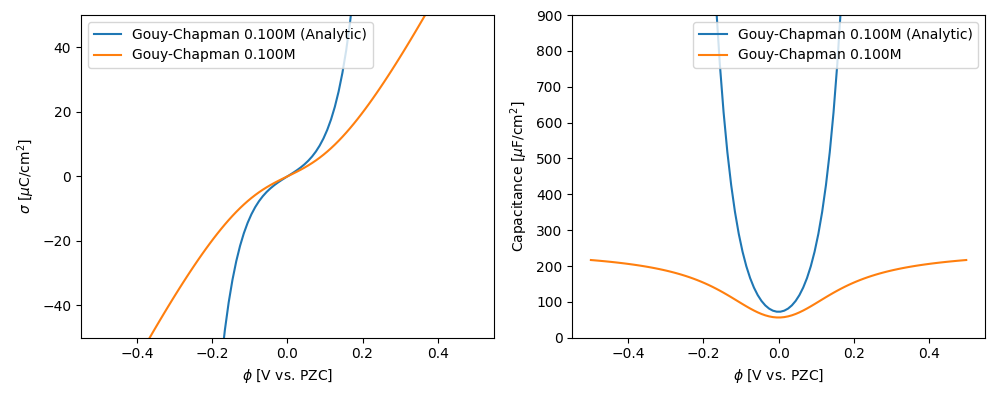

In [3]:
gc = edl.GouyChapman(ion_concentration_molar)
gc_nsol = gc.potential_sweep(potentials, tol=1e-3)
gc_asol = gc.analytical_sweep(potentials)

fig, ax = plotting.plot_potential_sweep([gc_asol, gc_nsol])
ax[1].set_ylim([0, 900])
plt.show()

Sweep from -0.01V to -0.50V. Maximum relative residual: 3.37688e-05.
Sweep from -0.01V to 0.50V. Maximum relative residual: 3.37688e-05.


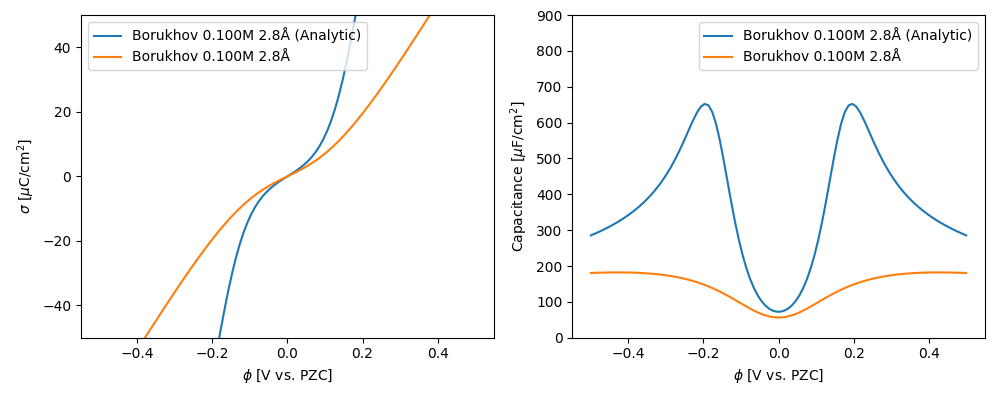

In [4]:
borukhov = edl.Borukhov(ion_concentration_molar, solvent_diameter_m)
borukhov_nsol = borukhov.potential_sweep(potentials, tol=1e-3)
borukhov_asol = borukhov.analytical_sweep(potentials)

fig, ax = plotting.plot_potential_sweep([borukhov_asol, borukhov_nsol])
ax[1].set_ylim([0, 900])
plt.show()

Sweep from -0.01V to -0.50V. Maximum relative residual: 3.43570e-05.
Sweep from -0.01V to 0.50V. Maximum relative residual: 3.64395e-05.
Sweep from -0.01V to -0.50V. Maximum relative residual: 3.50807e-05.
Sweep from -0.01V to 0.50V. Maximum relative residual: 3.50806e-05.


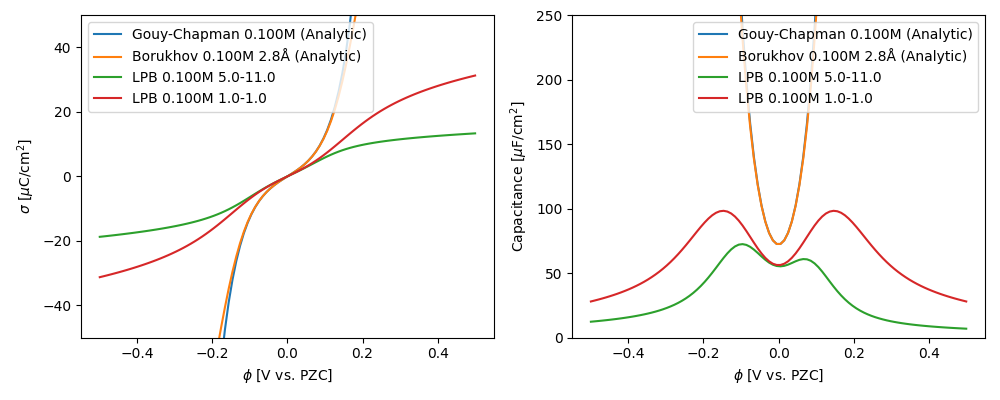

In [5]:
abr = edl.Abrashkin(ion_concentration_molar, 5, 11)
abr_nsol = abr.potential_sweep(potentials)

abr2 = edl.Abrashkin(ion_concentration_molar, 1, 1)
abr2_nsol = abr2.potential_sweep(potentials)

fig, ax = plotting.plot_potential_sweep([gc_asol, borukhov_asol, abr_nsol, abr2_nsol])
ax[1].set_ylim([0, 250])
plt.show()

Sweep from -0.01V to -1.00V. Maximum relative residual: 3.54102e-05.
Sweep from -0.01V to 1.00V. Maximum relative residual: 2.95041e-05.


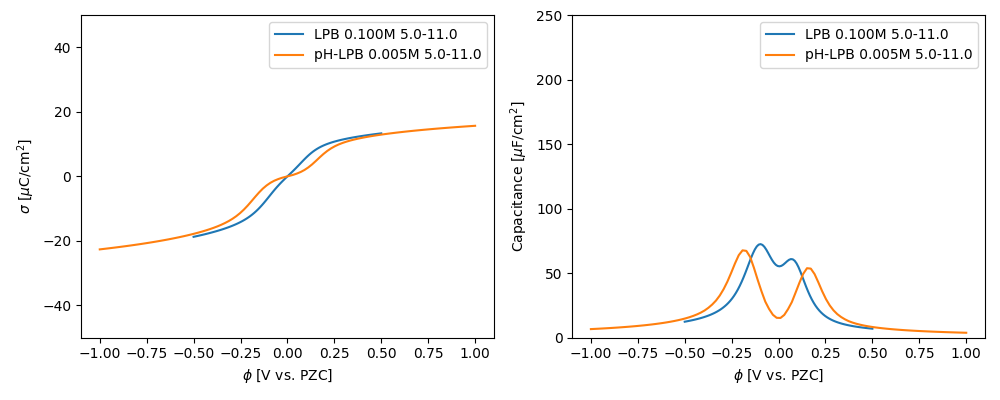

In [6]:
potentials = np.linspace(-1, 1, 100)
ph_lpb = edl.ProtonLPB(5e-3, 5, 11, 60, 15)
ph_lpb_nsol = ph_lpb.potential_sweep(potentials)

fig, ax = plotting.plot_potential_sweep([abr_nsol, ph_lpb_nsol])
ax[1].set_ylim([0, 250])
plt.show()